In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2020-05-03 05:03:09--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.15.108
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.15.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  16.6MB/s    in 16s     

2020-05-03 05:03:26 (15.0 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [0]:
import zipfile
with zipfile.ZipFile('/content/annotations_trainval2017.zip') as zipObj:
    zipObj.extractall()

In [4]:
!git clone https://github.com/waleedka/coco
!pip install -U setuptools
!pip install -U wheel
!make install -C coco/PythonAPI

Cloning into 'coco'...
remote: Enumerating objects: 904, done.
remote: Total 904 (delta 0), reused 0 (delta 0), pack-reused 904
Receiving objects: 100% (904/904), 10.39 MiB | 5.64 MiB/s, done.
Resolving deltas: 100% (539/539), done.
Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (46.1.3)
Requirement already up-to-date: wheel in /usr/local/lib/python3.6/dist-packages (0.34.2)
make: Entering directory '/content/coco/PythonAPI'
# install pycocotools to the Python site-packages
python setup.py build_ext install
Compiling pycocotools/_mask.pyx because it changed.
[1/1] Cythonizing pycocotools/_mask.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/coco/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running build_ext
building 'pycocotools._mask' extension
creating b

In [5]:
ls /content/coco/PythonAPI

Makefile  pycocoDemo.ipynb  pycocoEvalDemo.ipynb  pycocotools/  setup.py


In [0]:
from pycocotools.coco import COCO

In [7]:
coco=COCO('/content/annotations/instances_train2017.json')

loading annotations into memory...
Done (t=13.35s)
creating index...
index created!


In [0]:
catIds=coco.getCatIds(catNms=['person'])
imgIds=coco.getImgIds(catIds=catIds)
imgUrl=coco.loadImgs(imgIds[5])

In [9]:
print(len(imgIds))

64115


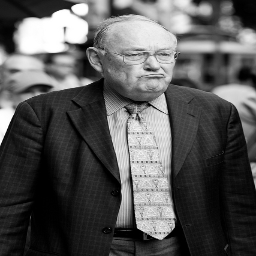

In [10]:
from google.colab.patches import cv2_imshow
import skimage.io as io
import cv2
img=io.imread(imgUrl[0]['coco_url'])
img=cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img=cv2.resize(img, (256,256))
cv2_imshow(img)

In [0]:
annIds=coco.getAnnIds(imgIds=imgIds[5], catIds=catIds)
anns=coco.loadAnns(annIds)

In [12]:
print(anns)

[{'segmentation': [[2.88, 365.3, 28.76, 273.26, 41.71, 253.12, 69.03, 238.74, 103.55, 224.36, 133.75, 218.61, 149.57, 209.98, 168.27, 197.03, 172.58, 189.84, 166.83, 178.34, 151.01, 151.01, 143.82, 122.25, 148.13, 115.06, 149.57, 112.18, 158.2, 80.54, 169.71, 56.09, 192.72, 43.15, 212.85, 37.39, 240.18, 40.27, 256.0, 46.02, 270.38, 64.72, 279.01, 74.79, 297.71, 86.29, 297.71, 104.99, 297.71, 116.49, 297.71, 130.88, 303.46, 133.75, 303.46, 145.26, 297.71, 151.01, 296.27, 159.64, 293.39, 175.46, 293.39, 192.72, 290.52, 202.79, 283.33, 209.98, 323.6, 220.04, 363.87, 237.3, 382.56, 250.25, 392.63, 266.07, 417.08, 378.25, 419.96, 428.58, 422.83, 455.91, 425.71, 631.37, 425.71, 640.0, 1.44, 635.69, 1.44, 368.18]], 'area': 190693.87274999998, 'iscrowd': 0, 'image_id': 393224, 'bbox': [1.44, 37.39, 424.27, 602.61], 'category_id': 1, 'id': 462133}, {'segmentation': [[94.68, 228.99, 85.13, 194.62, 68.42, 176.48, 71.29, 150.22, 73.67, 134.47, 116.64, 124.92, 132.39, 147.36, 125.71, 186.02, 138.12

7078.8056640625


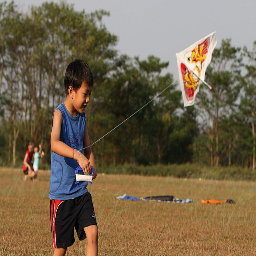

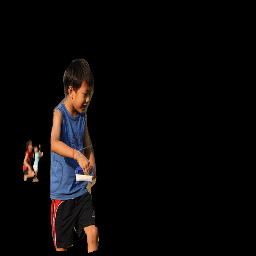

In [13]:
import numpy as np
import tensorflow as tf
i=np.random.randint(0,20000)
imgUrl=coco.loadImgs(imgIds[i])
img=io.imread(imgUrl[0]['coco_url'])
img=cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img=cv2.resize(img, (256,256))

annIds=coco.getAnnIds(imgIds=imgIds[i], catIds=catIds)
anns=coco.loadAnns(annIds)
mask0=coco.annToMask(anns[0])
mask=np.zeros((mask0.shape[0],mask0.shape[1],3))
mask[:,:,0]=mask0
mask=cv2.resize(mask, (256,256))
person=np.reshape(mask[:,:,0],[img.shape[0],img.shape[1],1])*img
print(np.sum(mask))
for j in range(1,len(anns)):
    mask0=coco.annToMask(anns[j])
    mask=np.zeros((mask0.shape[0],mask0.shape[1],3))
    mask[:,:,0]=mask0
    mask=cv2.resize(mask, (256,256))
    a=np.reshape(mask[:,:,0],[img.shape[0],img.shape[1],1])*img
    person+=a-a*person

cv2_imshow(img)
cv2_imshow(person)

In [0]:
import numpy as np
x=np.zeros([15000, 256, 256, 3], dtype=np.uint8)
y=np.zeros([15000, 256, 256, 1], dtype=np.uint8)

In [15]:
k=0
luu=0
for i in range(len(imgIds)):
    if (k%100==0 and k!=luu):
        luu=k
        print(str(k)+" "+str(i))

    annIds=coco.getAnnIds(imgIds=imgIds[i], catIds=catIds)
    anns=coco.loadAnns(annIds)
    mask0=coco.annToMask(anns[0])
    mask=np.zeros((mask0.shape[0],mask0.shape[1],3))
    mask[:,:,0]=mask0
    mask=cv2.resize(mask, (256,256))
    if (np.sum(mask)<1000): continue
    person=np.reshape(mask[:,:,0],[img.shape[0],img.shape[1],1])
    nho=0
    for j in range(1,len(anns)):
        mask0=coco.annToMask(anns[j])
        mask=np.zeros((mask0.shape[0],mask0.shape[1],3))
        mask[:,:,0]=mask0
        mask=cv2.resize(mask, (256,256))
        if (np.sum(mask)<1000):
            nho=1
            break
        a=np.reshape(mask[:,:,0],[img.shape[0],img.shape[1],1])
        person+=a-a*person
    if (np.sum(person)<5000 or np.sum(person)>20000): continue
    if (nho): continue
    y[k]=person

    imgUrl=coco.loadImgs(imgIds[i])
    img=io.imread(imgUrl[0]['coco_url'])
    img=cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    img=cv2.resize(img, (256,256))
    x[k]=img

    k+=1
    if (k==15000):
        break

100 409
200 854
300 1259
400 1700
500 2146
600 2566
700 3011
800 3478
900 3878
1000 4396
1100 4869
1200 5237
1300 5690
1400 6109
1500 6537
1600 6963
1700 7373
1800 7806
1900 8284
2000 8691
2100 9141
2200 9594
2300 10014
2400 10448
2500 10879
2600 11289
2700 11664
2800 12055
2900 12482
3000 12875
3100 13300
3200 13664
3300 14092
3400 14479
3500 14887
3600 15374
3700 15824
3800 16248
3900 16628
4000 17051
4100 17483
4200 17876
4300 18277
4400 18730
4500 19170
4600 19588
4700 19990
4800 20448
4900 20819
5000 21263
5100 21678
5200 22096
5300 22586
5400 23033
5500 23549
5600 23958
5700 24409
5800 24936
5900 25345
6000 25745
6100 26180
6200 26642
6300 27113
6400 27526
6500 27995
6600 28418
6700 28855
6800 29335
6900 29738
7000 30154
7100 30544
7200 30933
7300 31318
7400 31794
7500 32143
7600 32590
7700 32976
7800 33397
7900 33867
8000 34409
8100 34860
8200 35328
8300 35753
8400 36172
8500 36534
8600 37007
8700 37451
8800 37898
8900 38343
9000 38733
9100 39136
9200 39544
9300 39915
9400 40359

6158


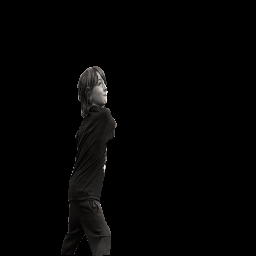

In [22]:
i=np.random.randint(100)
print(np.sum(y[1]))
cv2_imshow(x[1]*y[1])

In [0]:
y=y[0:14900]

In [20]:
print(y.shape)

(14900, 256, 256, 1)


In [0]:
#np.save("/content/drive/My Drive/PersonSegmentation/x.npy", x)
np.save("/content/drive/My Drive/PersonSegmentation/y.npy", y)

In [0]:
from google.colab.patches import cv2_imshow
import skimage.io as io
import cv2
import tensorflow as tf
import numpy as np
x=np.load("/content/drive/My Drive/PersonSegmentation/x.npy")
y=np.load("/content/drive/My Drive/PersonSegmentation/y.npy")

In [0]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import UpSampling2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam

def unet_model():
    #input=Input(shape=(256,256,3))

    vgg = VGG16(include_top=False, weights='imagenet', input_shape=(256,256,3))

    x1=Conv2D(512, 3, activation='relu', padding='same')(vgg.get_layer(name="block5_pool").output)
    x1=Conv2D(512, 3, activation='relu', padding='same')(x1)

    x2=UpSampling2D((2,2))(x1)
    x2=concatenate([vgg.get_layer(name="block5_conv3").output, x2], axis=3)
    x2=Conv2D(512, 3, activation='relu', padding='same')(x2)
    x2=Conv2D(512, 3, activation='relu', padding='same')(x2)

    x3=UpSampling2D((2,2))(x2)
    x3=concatenate([vgg.get_layer(name="block4_conv3").output, x3], axis=3)
    x3=Conv2D(512, 3, activation='relu', padding='same')(x3)
    x3=Conv2D(512, 3, activation='relu', padding='same')(x3)

    x4=UpSampling2D((2,2))(x3)
    x4=concatenate([vgg.get_layer(name="block3_conv3").output, x4], axis=3)
    x4=Conv2D(256, 3, activation='relu', padding='same')(x4)
    x4=Conv2D(256, 3, activation='relu', padding='same')(x4)

    x5=UpSampling2D((2,2))(x4)
    x5=concatenate([vgg.get_layer(name="block2_conv2").output, x5], axis=3)
    x5=Conv2D(128, 3, activation='relu', padding='same')(x5)
    x5=Conv2D(128, 3, activation='relu', padding='same')(x5)

    x6=UpSampling2D((2,2))(x5)
    x6=concatenate([vgg.get_layer(name="block1_conv2").output, x6], axis=3)
    x6=Conv2D(64, 3, activation='relu', padding='same')(x6)
    x6=Conv2D(64, 3, activation='relu', padding='same')(x6)

    output=Conv2D(1, 1, activation='sigmoid', padding='same')(x6)

    model=Model(inputs=vgg.input, outputs=output)
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics = ['accuracy'])
    return model

In [0]:
model=unet_model()
model.summary()

In [0]:
#model.load_weights("/content/drive/My Drive/PersonSegmentation/weight.h5")

In [0]:
import tensorflow as tf
import os
checkpoint_path = "/content/drive/My Drive/PersonSegmentation/weight.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
model.fit(x[:16000], y[:16000], batch_size=32,
          epochs=50,
          verbose=1,
          validation_data=(x[16000:],y[16000:]),
          callbacks=[cp_callback])

In [0]:
img=x[np.random.randint(16000,20000)]
cv2_imshow(img)
mask=model.predict(tf.reshape(img, [1,256,256,3]), steps=1)
mask0=np.zeros([256,256,3])
mask0[:,:,0]=np.reshape(mask, (256,256))
mask0=cv2.blur(mask0, (5,5), 0)
mask=np.reshape(mask0[:,:,0], (256,256,1))
cv2_imshow(((mask>0.3)*img))

In [0]:
mask=model.predict(tf.reshape(img, [1,256,256,3]), steps=1)

In [0]:
print(np.zeros([2], dtype=np.int8))

In [0]:
cv2_imshow((np.round(mask)*img)[0])